In [2]:
#ggplot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly
import plotly.express as px
import plotly.graph_objs as go
from sklearn.metrics import adjusted_rand_score

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

In [9]:
df=pd.read_csv('./cleaned_df.csv', sep=',' )

In [10]:
df1=pd.read_csv('./activity.csv', sep=',' )

In [12]:
df_smiles = pd.read_csv('./cleaned_df.csv', sep=',' )

In [13]:
df_smiles = df_smiles[['Molecule ChEMBL ID','Smiles']]

In [14]:
df1 = df1[['Molecule ChEMBL ID','class']]

In [69]:
#df= df.groupby(['Name'], as_index=False).mean()

In [15]:
df.columns

Index(['Molecule ChEMBL ID', 'RO5_violations', 'Smiles', 'bioactivity_class',
       'MW', 'LogP', 'NumHDonors', 'NumHAcceptors', 'NumRadicalElectrons',
       'NumValenceElectrons', 'FP1', 'FP2', 'FP3', 'HeavyAtomMolWt', 'pIC50'],
      dtype='object')

In [16]:
df1 = df1.rename(columns={"Molecule ChEMBL ID": "Name"})

In [17]:
df = df.rename(columns={"Molecule ChEMBL ID": "Name"})

In [18]:
df = pd.merge(df1, df, how="left", on=["Name"])

In [19]:
df = df.drop_duplicates(['Name'])
df=df.reset_index(drop=True)

In [21]:
df=df.reset_index(drop=True)

In [22]:
df2 = df.drop(['Name','class'], axis= 1)

In [23]:
df =df.dropna()

In [25]:
features = ['MW', 'LogP', 'NumHDonors', 'NumHAcceptors']

In [26]:
x = df.loc[:, features].values
target = ['class']
y = df.loc[:,target].values
x = StandardScaler().fit_transform(x)

In [27]:
df = df.reset_index()
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [28]:
    pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

In [29]:
finalDf = pd.concat([principalDf, df[['class']]], axis = 1)

In [30]:
finalDf

,principal component 1,principal component 2,principal component 3,class
0,-2.001535,-0.385324,0.044134,active
1,0.692645,-0.291065,0.629998,inactive
2,0.309045,-0.563460,1.193568,inactive
3,-0.292087,-0.216336,1.127869,inactive
4,1.411113,-2.258015,-0.756016,intermediate
...,...,...,...,...
810,3.406519,-0.326709,0.110191,active
811,3.737990,0.793374,0.260369,active
812,0.992003,0.861386,0.791889,active
813,7.934711,0.488727,2.252156,active


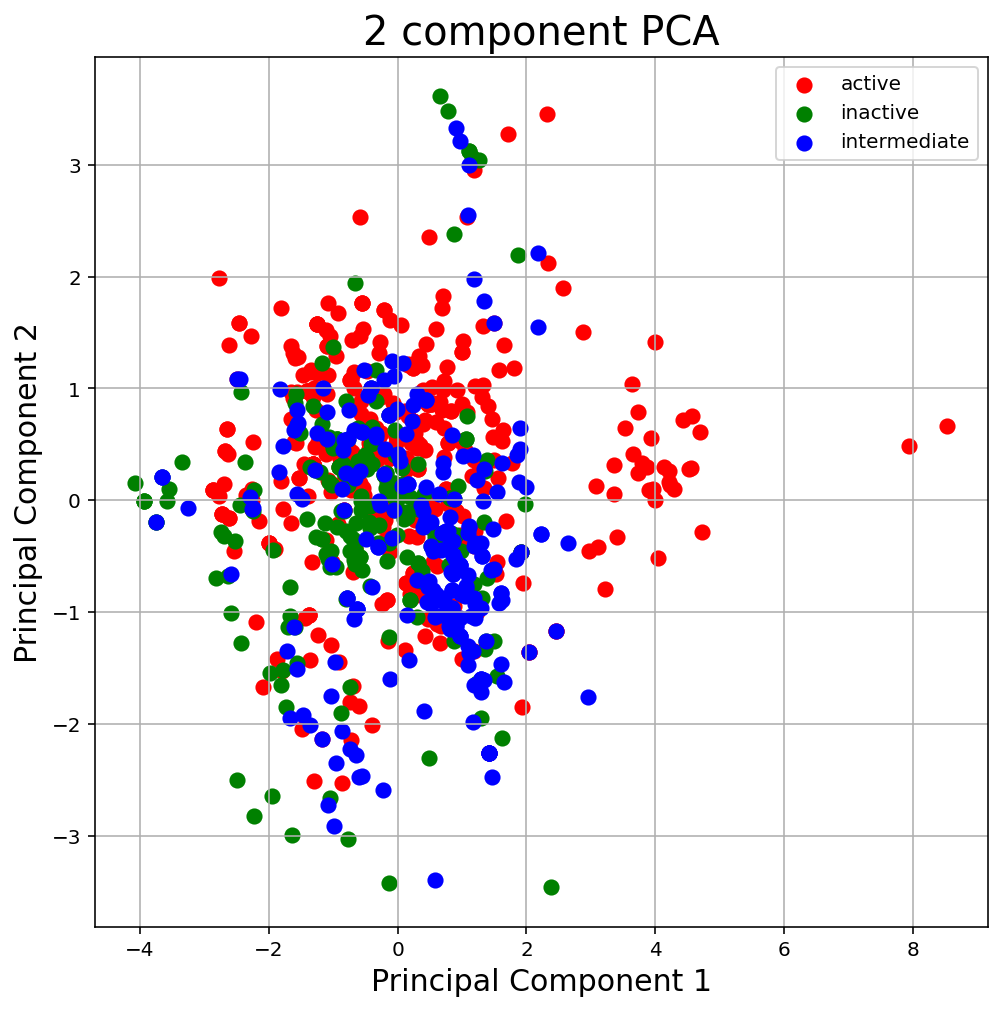

In [33]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['active','inactive','intermediate']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [34]:
pca.explained_variance_ratio_

array([0.58566671, 0.28391004, 0.11232276])

## Silhouette analysis and K\-means



In [35]:
descriptors = df.loc[:, ['MW', 'LogP', 'NumHDonors', 'NumHAcceptors']].values

In [36]:
descriptors_std = StandardScaler().fit_transform(descriptors)

In [37]:
pca = PCA()
descriptors_2d = pca.fit_transform(descriptors_std)

In [39]:
descriptors_pca= pd.DataFrame(descriptors_2d)
descriptors_pca.index = df.index
descriptors_pca.columns = ['PC{}'.format(i+1) for i in descriptors_pca.columns]
descriptors_pca.head(10)

,PC1,PC2,PC3,PC4
0,-2.001535,-0.385324,0.044134,-0.145319
1,0.692645,-0.291065,0.629998,-0.011473
2,0.309045,-0.563460,1.193568,0.092109
3,-0.292087,-0.216336,1.127869,0.390459
4,1.411113,-2.258015,-0.756016,0.112974
5,-0.513422,0.405817,0.586312,-0.200860
6,-0.626038,-0.968428,-0.770984,0.183314
7,-0.774216,0.550421,-0.510567,0.091104
8,-1.008066,1.368096,0.106590,0.008374
9,0.034251,0.353080,0.855255,-0.198942


<Figure size 576x432 with 0 Axes>

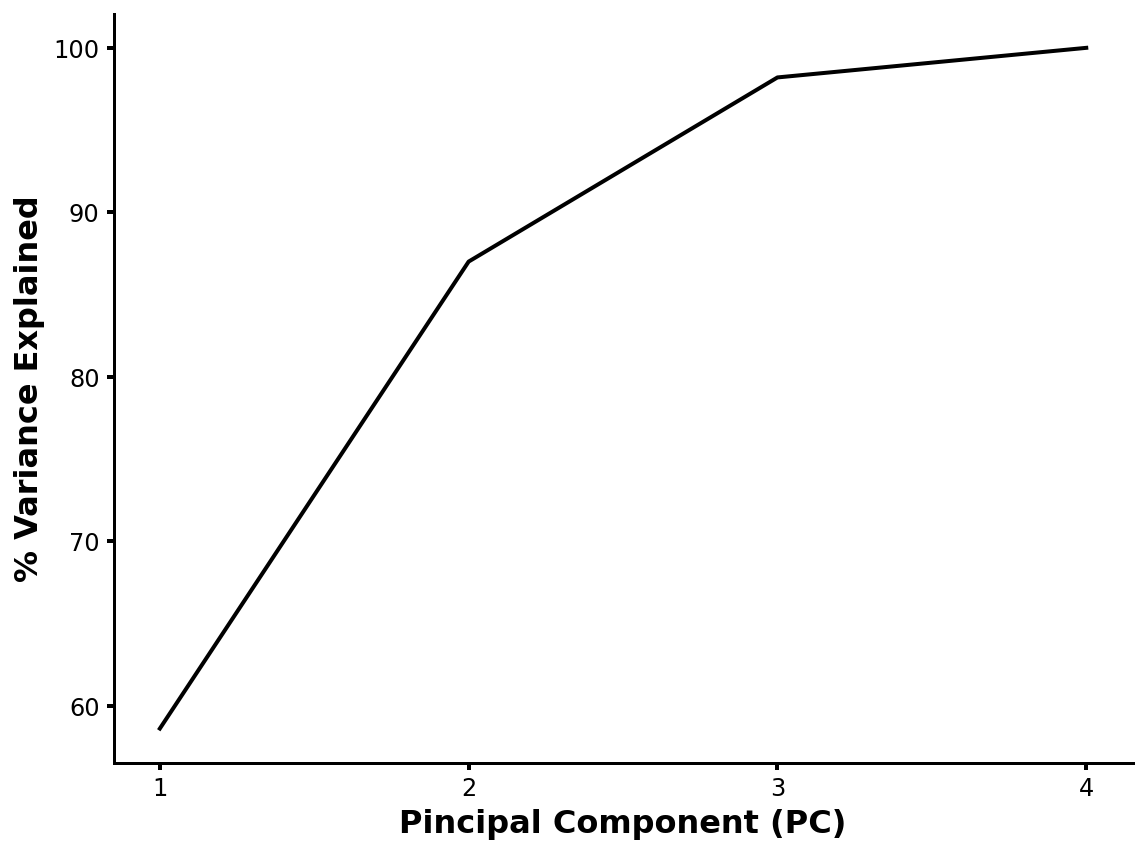

In [40]:
plt.rcParams['axes.linewidth'] = 1.5
plt.figure(figsize=(8,6))
fig, ax = plt.subplots(figsize=(8,6))

var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
plt.plot([i+1 for i in range(len(var))],var,'k-',linewidth=2)
plt.xticks([i+1 for i in range(len(var))])
plt.ylabel('% Variance Explained',fontsize=16,fontweight='bold')
plt.xlabel('Pincipal Component (PC)',fontsize=16,fontweight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.tick_params ('both',width=2,labelsize=12)

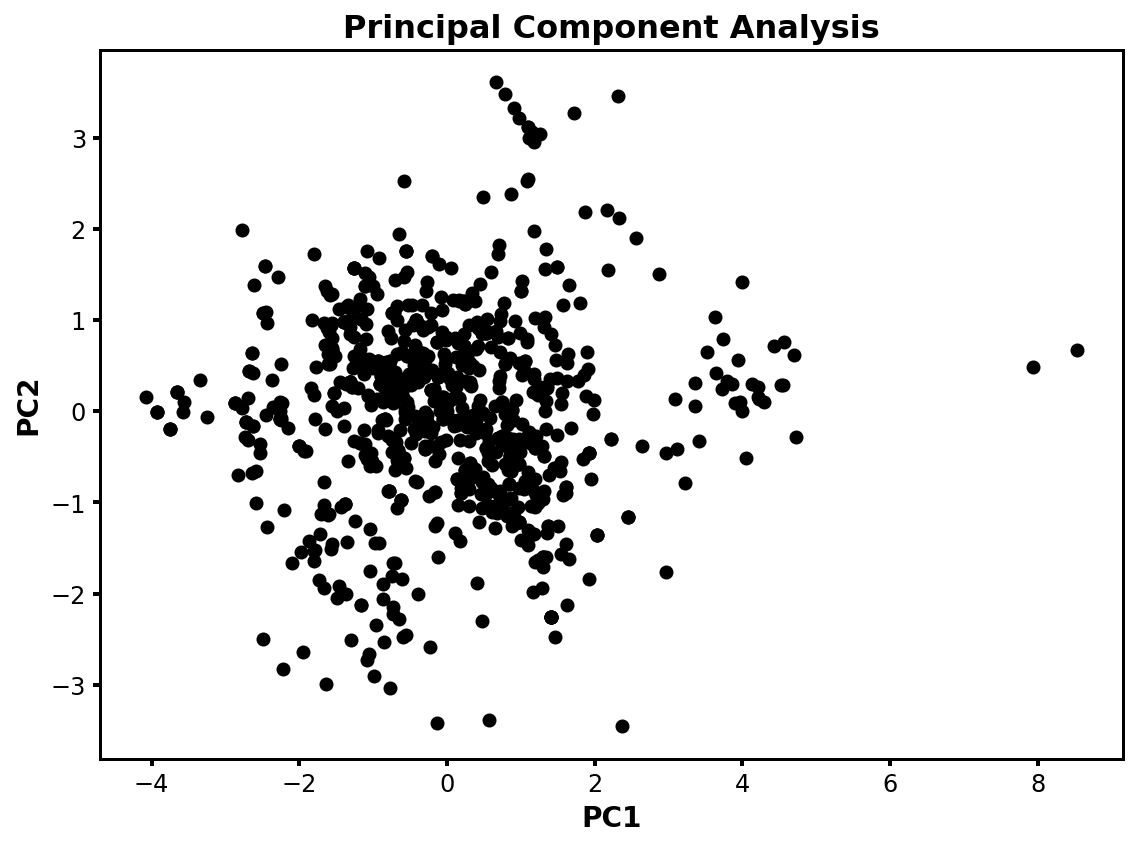

In [41]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.plot(descriptors_pca['PC1'],descriptors_pca['PC2'],'o',color='k')
ax.set_title ('Principal Component Analysis',fontsize=16,fontweight='bold',family='sans-serif')
ax.set_xlabel ('PC1',fontsize=14,fontweight='bold')
ax.set_ylabel ('PC2',fontsize=14,fontweight='bold')

plt.tick_params ('both',width=2,labelsize=12)

plt.tight_layout()
plt.show()


In [13]:
# kmeans

In [42]:
# This normalization will be performed just for PC1 and PC2, but can be done for all the components.
scale1 = 1.0/(max(descriptors_pca['PC1']) - min(descriptors_pca['PC1']))
scale2 = 1.0/(max(descriptors_pca['PC2']) - min(descriptors_pca['PC2']))

# And we add the new values to our PCA table
descriptors_pca['PC1_normalized']=[i*scale1 for i in descriptors_pca['PC1']]
descriptors_pca['PC2_normalized']=[i*scale2 for i in descriptors_pca['PC2']]

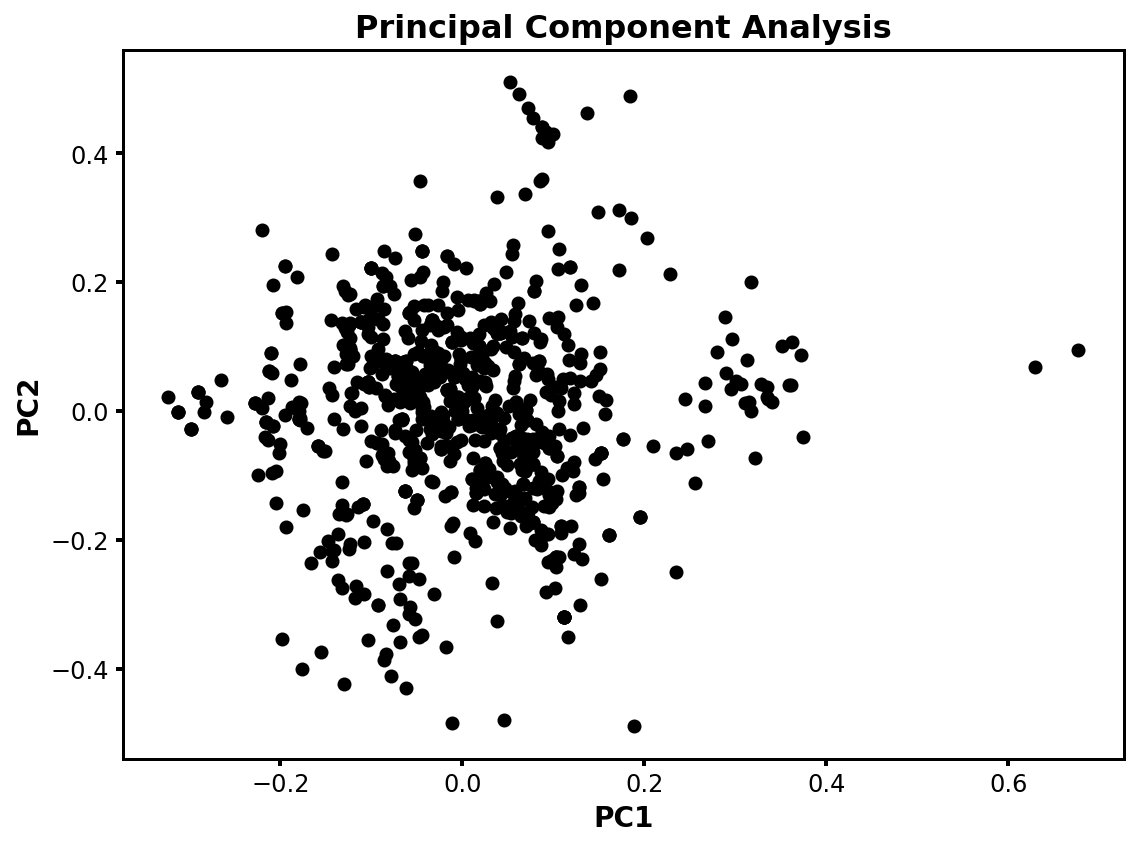

In [43]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.plot(descriptors_pca['PC1_normalized'],descriptors_pca['PC2_normalized'],'o',color='k')
ax.set_title ('Principal Component Analysis',fontsize=16,fontweight='bold',family='sans-serif')
ax.set_xlabel ('PC1',fontsize=14,fontweight='bold')
ax.set_ylabel ('PC2',fontsize=14,fontweight='bold')

plt.tick_params ('both',width=2,labelsize=12)

plt.tight_layout()
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.3627026061377042


For n_clusters = 3 The average silhouette_score is : 0.3431229196182701


For n_clusters = 4 The average silhouette_score is : 0.32162678276469003


For n_clusters = 5 The average silhouette_score is : 0.3479925337232483


For n_clusters = 6 The average silhouette_score is : 0.34440913779531374


For n_clusters = 7 The average silhouette_score is : 0.361599096137266


For n_clusters = 8 The average silhouette_score is : 0.38629411459060164


For n_clusters = 9 The average silhouette_score is : 0.38392959623486317


For n_clusters = 10 The average silhouette_score is : 0.3887547825601165


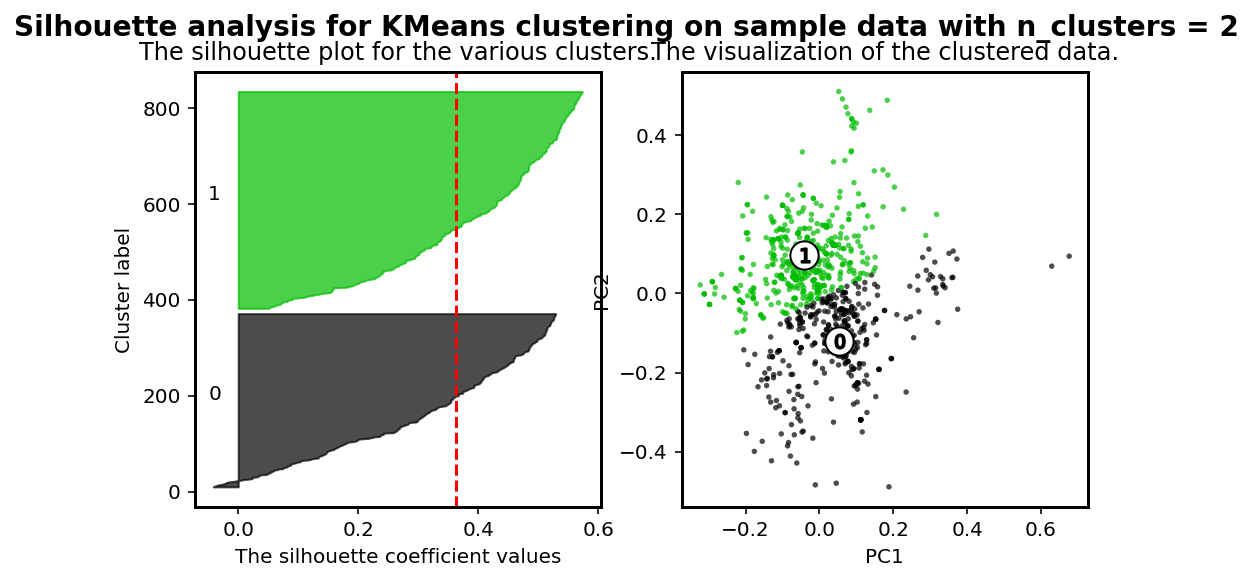

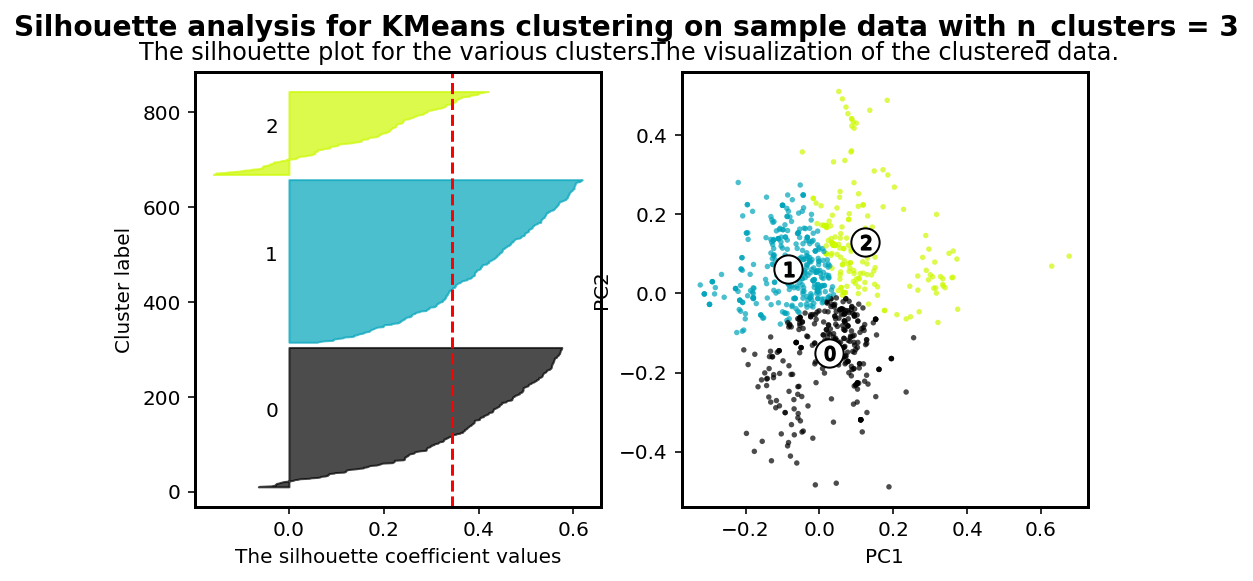

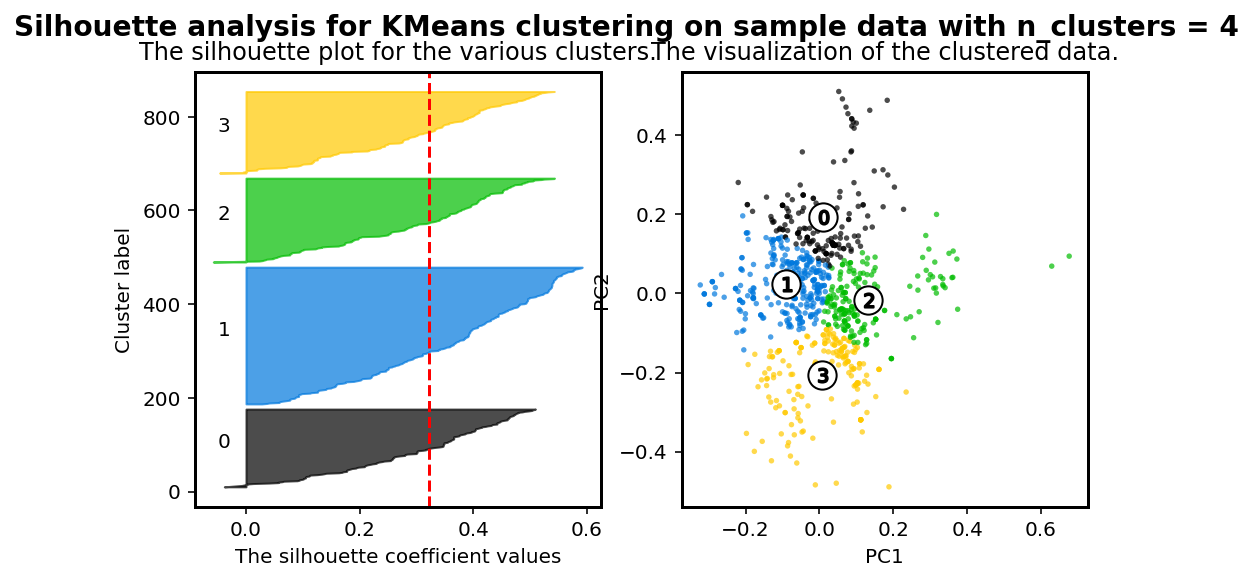

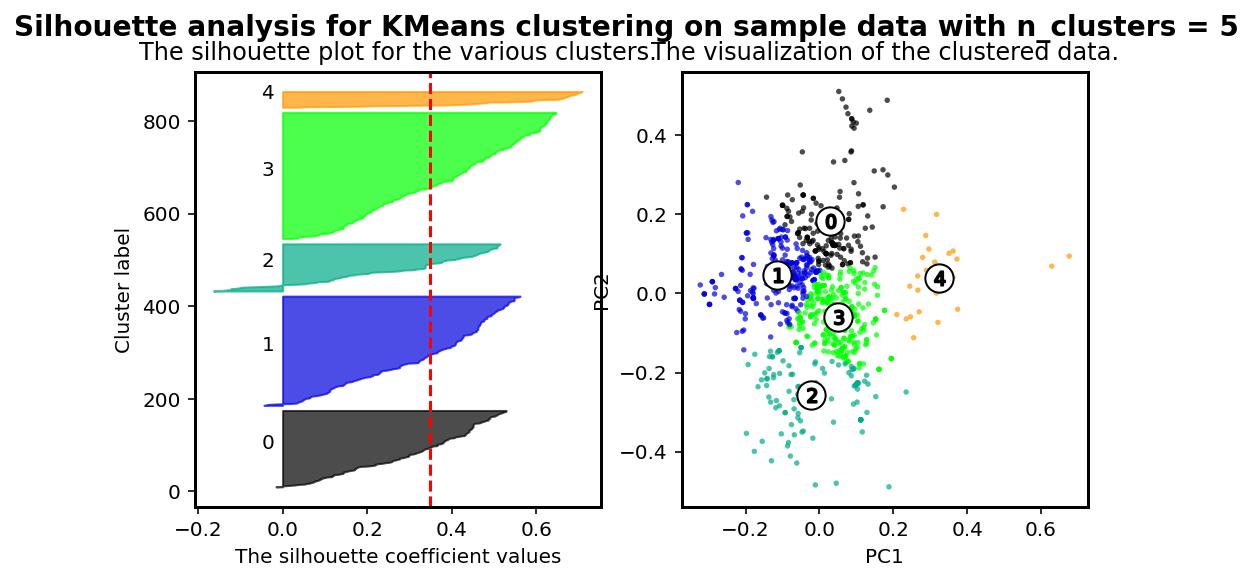

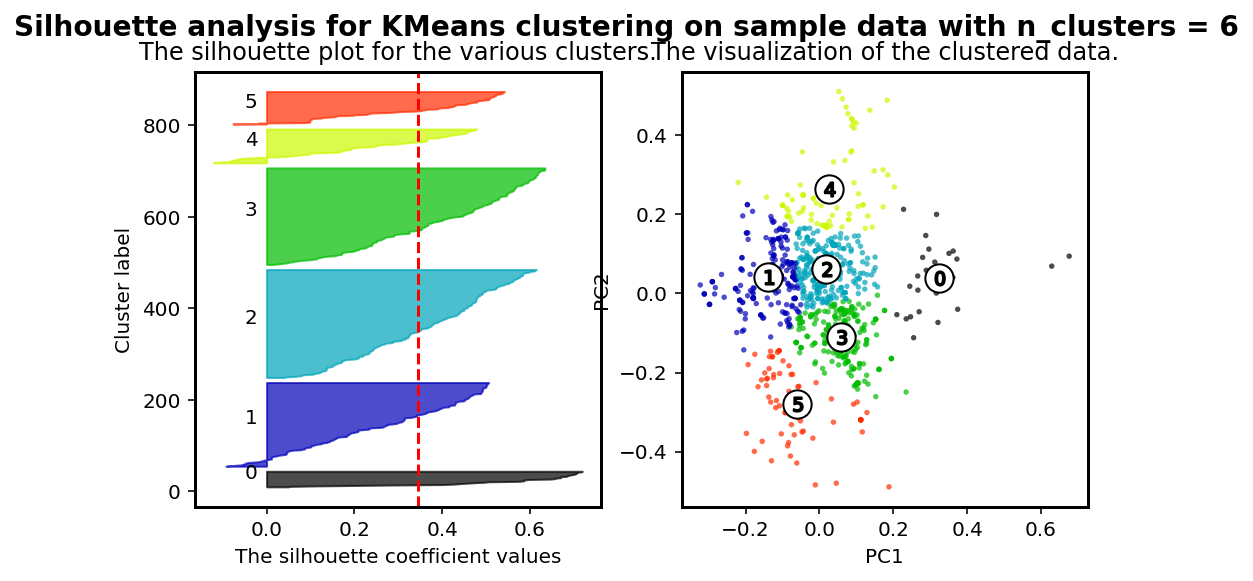

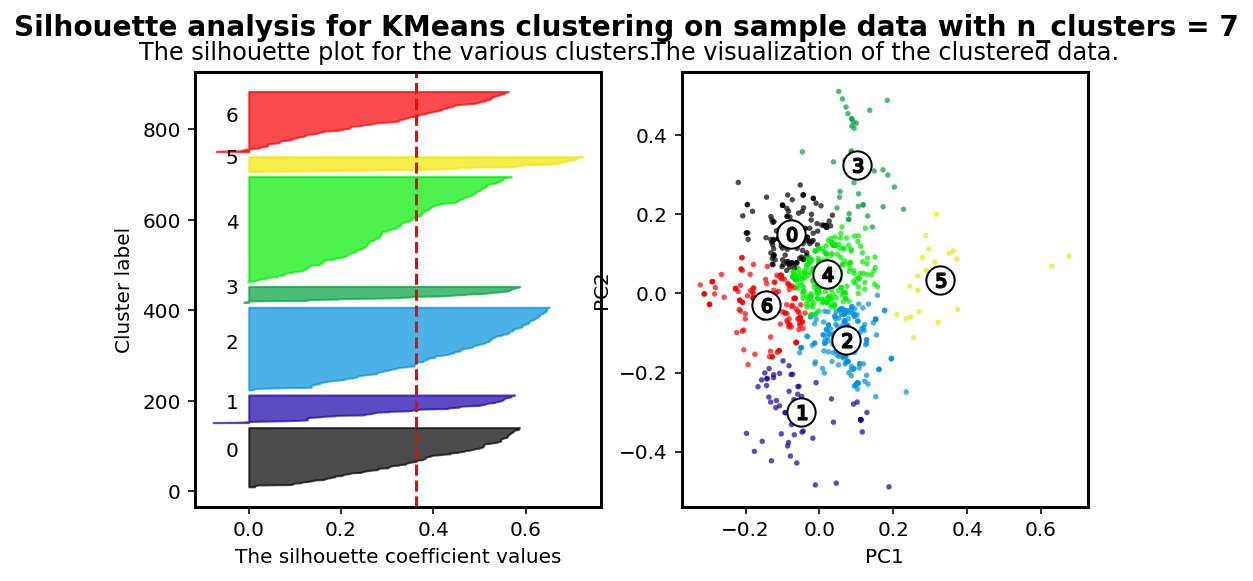

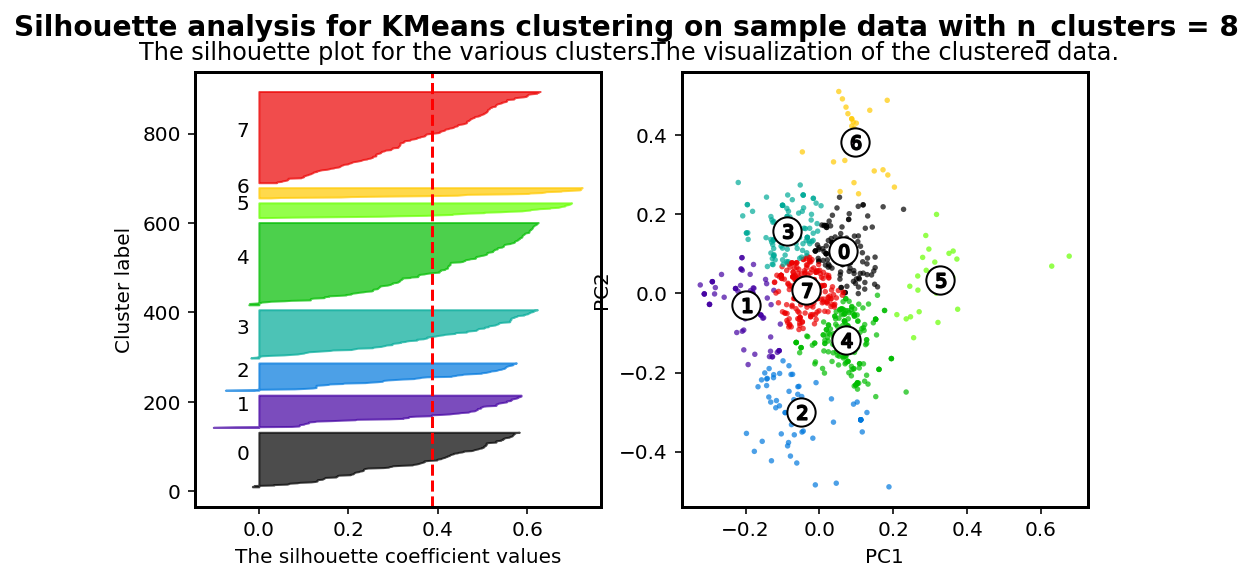

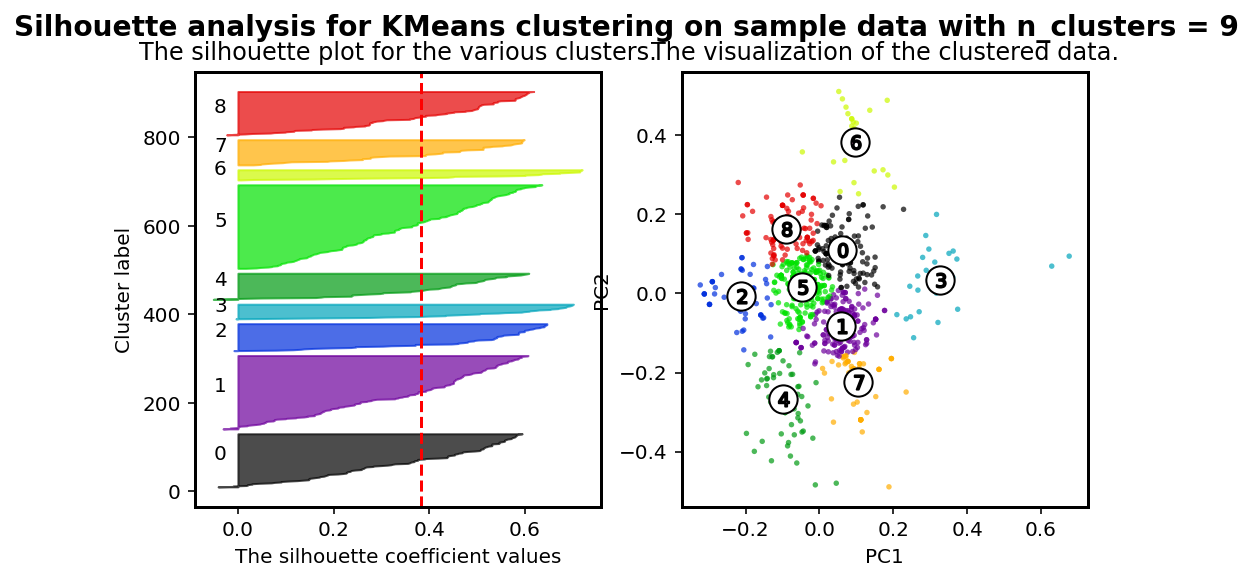

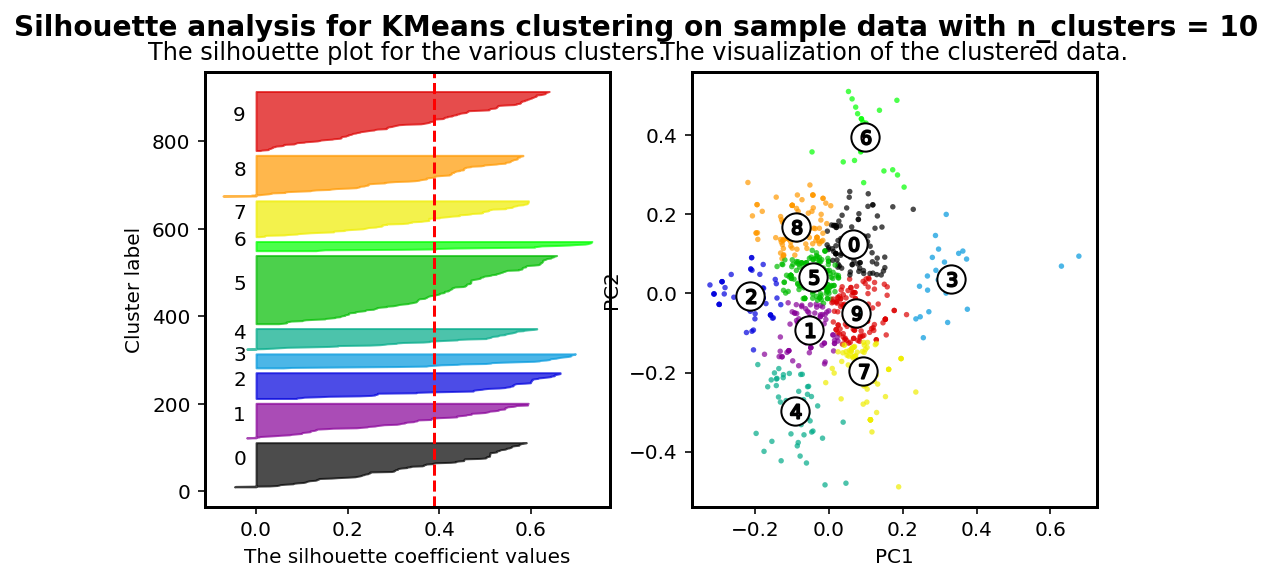

In [44]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for n_clusters in range_n_clusters:
    fig, (ax1,ax2)= plt.subplots(1, 2)
    fig.set_size_inches(8, 4)
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = kmeans.fit_predict(descriptors_pca[['PC1_normalized','PC2_normalized']])
    silhouette_avg = silhouette_score(descriptors_pca[['PC1_normalized','PC2_normalized']], cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    sample_silhouette_values = silhouette_samples(descriptors_pca[['PC1_normalized','PC2_normalized']], cluster_labels)

    y_lower = 10
    
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")


    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(descriptors_pca['PC1_normalized'], descriptors_pca['PC2_normalized'], 
                marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k')


    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("PC1")
    ax2.set_ylabel("PC2")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    
plt.show()

In [45]:
kmeans = KMeans(n_clusters=3, random_state=10) # We define the best number of clusters
clusters = kmeans.fit(descriptors_pca[['PC1_normalized','PC2_normalized']]) #PC1 vs PC2 (normalized values)

In [46]:
descriptors_pca['Cluster_PC1_PC2'] = pd.Series(clusters.labels_, index=df.index)

In [47]:
descriptors_pca.head(10)

,PC1,PC2,PC3,PC4,PC1_normalized,PC2_normalized,Cluster_PC1_PC2
0,-2.001535,-0.385324,0.044134,-0.145319,-0.158838,-0.054521,1
1,0.692645,-0.291065,0.629998,-0.011473,0.054967,-0.041184,0
2,0.309045,-0.563460,1.193568,0.092109,0.024525,-0.079725,0
3,-0.292087,-0.216336,1.127869,0.390459,-0.023179,-0.030610,1
4,1.411113,-2.258015,-0.756016,0.112974,0.111983,-0.319493,0
5,-0.513422,0.405817,0.586312,-0.200860,-0.040744,0.057420,1
6,-0.626038,-0.968428,-0.770984,0.183314,-0.049681,-0.137026,0
7,-0.774216,0.550421,-0.510567,0.091104,-0.061440,0.077881,1
8,-1.008066,1.368096,0.106590,0.008374,-0.079998,0.193576,1
9,0.034251,0.353080,0.855255,-0.198942,0.002718,0.049958,1


In [48]:
print(pca.explained_variance_ratio_) 
print(sum(pca.explained_variance_ratio_))

[0.58566671 0.28391004 0.11232276 0.01810049]
1.0000000000000002


<Figure size 720x576 with 0 Axes>

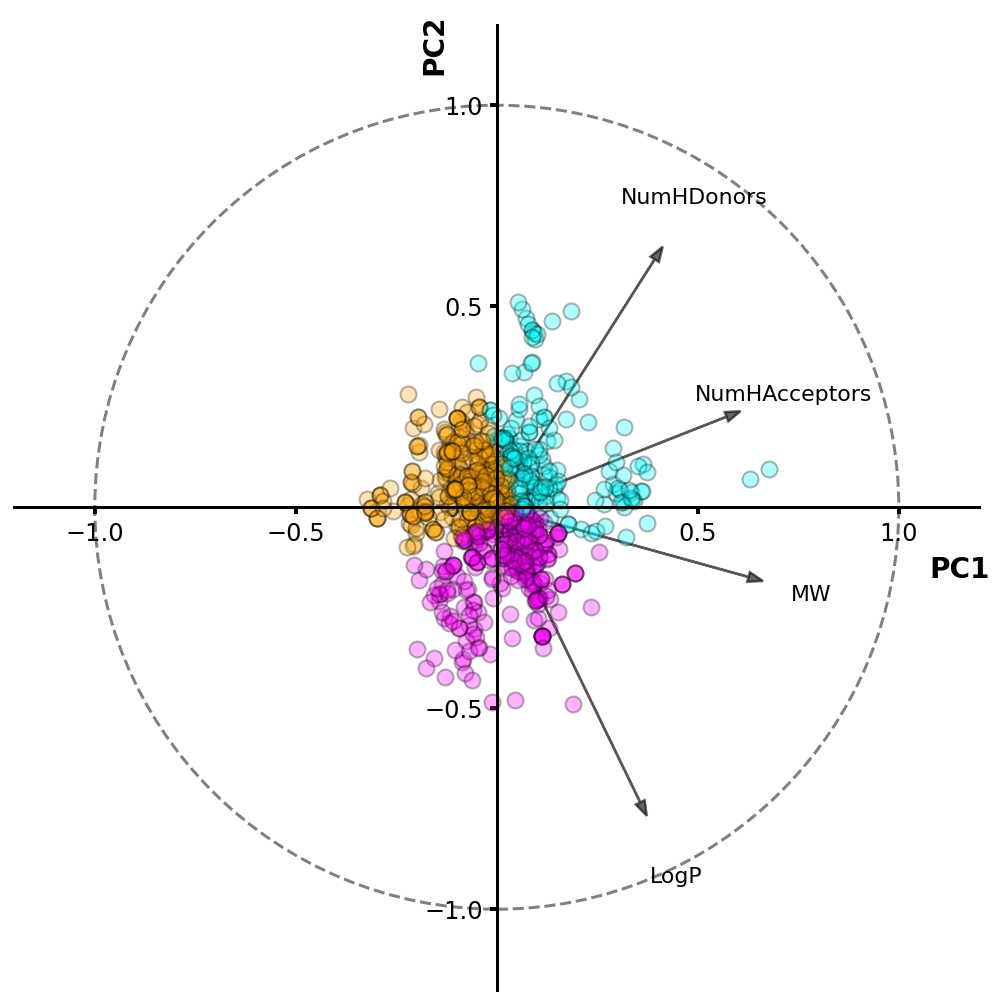

In [49]:
plt.rcParams['axes.linewidth'] = 1.5
plt.figure(figsize=(10,8))

fig, ax = plt.subplots(figsize=(7,7))

color_code={ 0:        'magenta',\
             1.0:   'orange',\
             2.0:      'cyan',\
             3.0:           'c',\
             4.0:        'm',\
             5.0:        'y',\
             6.0:        'darkorange',
             7.0:       'k',
             }

for i in descriptors_pca.index: 
        ax.plot(descriptors_pca.loc[i].at['PC1_normalized'],descriptors_pca.loc[i].at['PC2_normalized'],
                    c=color_code[descriptors_pca.loc[i].at['Cluster_PC1_PC2']],
                    marker='o',markersize=8,markeredgecolor='k',alpha=0.3)
        

plt.xlabel ('PC1',fontsize=14,fontweight='bold')
ax.xaxis.set_label_coords(0.98, 0.45)
plt.ylabel ('PC2',fontsize=14,fontweight='bold')
ax.yaxis.set_label_coords(0.45, 0.98)
plt.tick_params ('both',width=2,labelsize=12)
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

lab=['MW', 'LogP', 'NumHDonors', 'NumHAcceptors'] #Feature labels

l=np.transpose(pca.components_[0:2, :]) ## We will get the components eigenvectors (main features) for PC1 and PC2

n = l.shape[0]
for i in range(n):
    plt.arrow(0, 0, l[i,0], l[i,1],color= 'k',alpha=0.6,linewidth=1.2,head_width=0.025)
    plt.text(l[i,0]*1.25, l[i,1]*1.25, lab[i], color = 'k',va = 'center', ha = 'center',fontsize=11)

circle = plt.Circle((0,0), 1, color='gray', fill=False,clip_on=True,linewidth=1.5,linestyle='--')
ax.add_artist(circle)
plt.xlim(-1.2,1.2)
plt.ylim(-1.2,1.2)
plt.tight_layout()
plt.show()

In [111]:
#As a result, we can identify the features that correlate positively and negatively with PC1 (HBA, MolWt), and with PC2 (LogP and HBD). Additionally, we can see that LogP is the "most important" feature (descriptor) because of the vector length. And also we can see the 3 different clusters we identified by the silhouette-based algorithm.